In [1]:
source("oae_ts.R")

Loading required package: MASS

Loading required package: strucchange

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: urca

Loading required package: lmtest

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

<U+221A> ggplot2 3.2.1     <U+221A> purrr   0.3.3
<U+221A> tibble  2.1.3     <U+221A> dplyr   0.8.4
<U+221A> tidyr   1.0.2     <U+221A> stringr 1.4.0
<U+221A> readr   1.3.1     <U+221A> forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x stringr::boundary() masks strucchange::boundary()
x dplyr::filter()     masks stats::filter()
x dplyr::lag()        masks stats::lag()
x dplyr::select()     masks MASS::select()



In [2]:
library("readxl")
price = read_excel("../data/rice/rice_price_tidy.xlsx", sheet = "price")

In [10]:
fgp_h = price[2:4] %>% na.omit()

In [11]:
unit_test_report(fgp_h)

col_name,level,type,ADF_cv01,ADF_cv05,ADF_cv10,ADF_lag,ADF_tstat,KPSS_cv01,KPSS_cv05,KPSS_cv10,KPSS_lag,KPSS_tstat,stationary_ADF,stationary_KPSS
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
RHFG_0,d0,drift,-3.44,-2.87,-2.57,1,-1.697896,0.739,0.463,0.347,5,3.55538374,FALSE,FALSE
RHFG_0,d0,trend,-3.98,-3.42,-3.13,1,-3.756691,0.216,0.146,0.119,5,0.45170210,TRUE,FALSE
RHFG_0,d1,drift,-3.44,-2.87,-2.57,1,-11.560776,0.739,0.463,0.347,5,0.03717800,TRUE,TRUE
RHFG_1,d0,drift,-3.44,-2.87,-2.57,1,-1.332692,0.739,0.463,0.347,5,3.43439311,FALSE,FALSE
RHFG_1,d0,trend,-3.98,-3.42,-3.13,1,-3.039270,0.216,0.146,0.119,5,0.37767351,FALSE,FALSE
RHFG_1,d1,drift,-3.44,-2.87,-2.57,1,-11.362940,0.739,0.463,0.347,5,0.03527250,TRUE,TRUE
RHFG_2,d0,drift,-3.44,-2.87,-2.57,1,-1.648773,0.739,0.463,0.347,5,3.54871932,FALSE,FALSE
RHFG_2,d0,trend,-3.98,-3.42,-3.13,1,-3.673428,0.216,0.146,0.119,5,0.43031415,TRUE,FALSE
RHFG_2,d1,drift,-3.44,-2.87,-2.57,1,-12.204591,0.739,0.463,0.347,5,0.04040944,TRUE,TRUE


In [14]:
VARselect(fgp_h, lag.max = 8, type = "both")

,1,2,3,4,5,6,7,8
AIC(n),3.568967e+01,3.561035e+01,3.559795e+01,3.563672e+01,3.566433e+01,3.566162e+01,3.568311e+01,3.570094e+01
HQ(n),3.577154e+01,3.574136e+01,3.577808e+01,3.586598e+01,3.594271e+01,3.598913e+01,3.605974e+01,3.612669e+01
SC(n),3.589340e+01,3.593633e+01,3.604617e+01,3.620718e+01,3.635703e+01,3.647656e+01,3.662029e+01,3.676036e+01
FPE(n),3.161046e+15,2.920147e+15,2.884404e+15,2.998911e+15,3.083598e+15,3.076307e+15,3.144578e+15,3.203053e+15


In [20]:
res = VAR(fgp_h, p = 1, type = "both")

In [24]:
summary(res, equation = "RHFG_0")


VAR Estimation Results:
Endogenous variables: RHFG_0, RHFG_1, RHFG_2 
Deterministic variables: both 
Sample size: 270 
Log Likelihood: -5946.505 
Roots of the characteristic polynomial:
0.9419 0.6059 0.6059
Call:
VAR(y = fgp_h, p = 1, type = "both")


Estimation results for equation RHFG_0: 
RHFG_0 = RHFG_0.l1 + RHFG_1.l1 + RHFG_2.l1 + const + trend 

           Estimate Std. Error t value Pr(>|t|)    
RHFG_0.l1   0.07351    0.19451   0.378  0.70578    
RHFG_1.l1   0.04470    0.05686   0.786  0.43256    
RHFG_2.l1   0.80820    0.17417   4.640 5.47e-06 ***
const     263.12621  100.04147   2.630  0.00903 ** 
trend       2.35165    0.94979   2.476  0.01391 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 618.4 on 265 degrees of freedom
Multiple R-Squared: 0.9718,	Adjusted R-squared: 0.9714 
F-statistic:  2283 on 4 and 265 DF,  p-value: < 2.2e-16 



Covariance matrix of residuals:
       RHFG_0 RHFG_1 RHFG_2
RHFG_0 382372 272280 367419
RHF

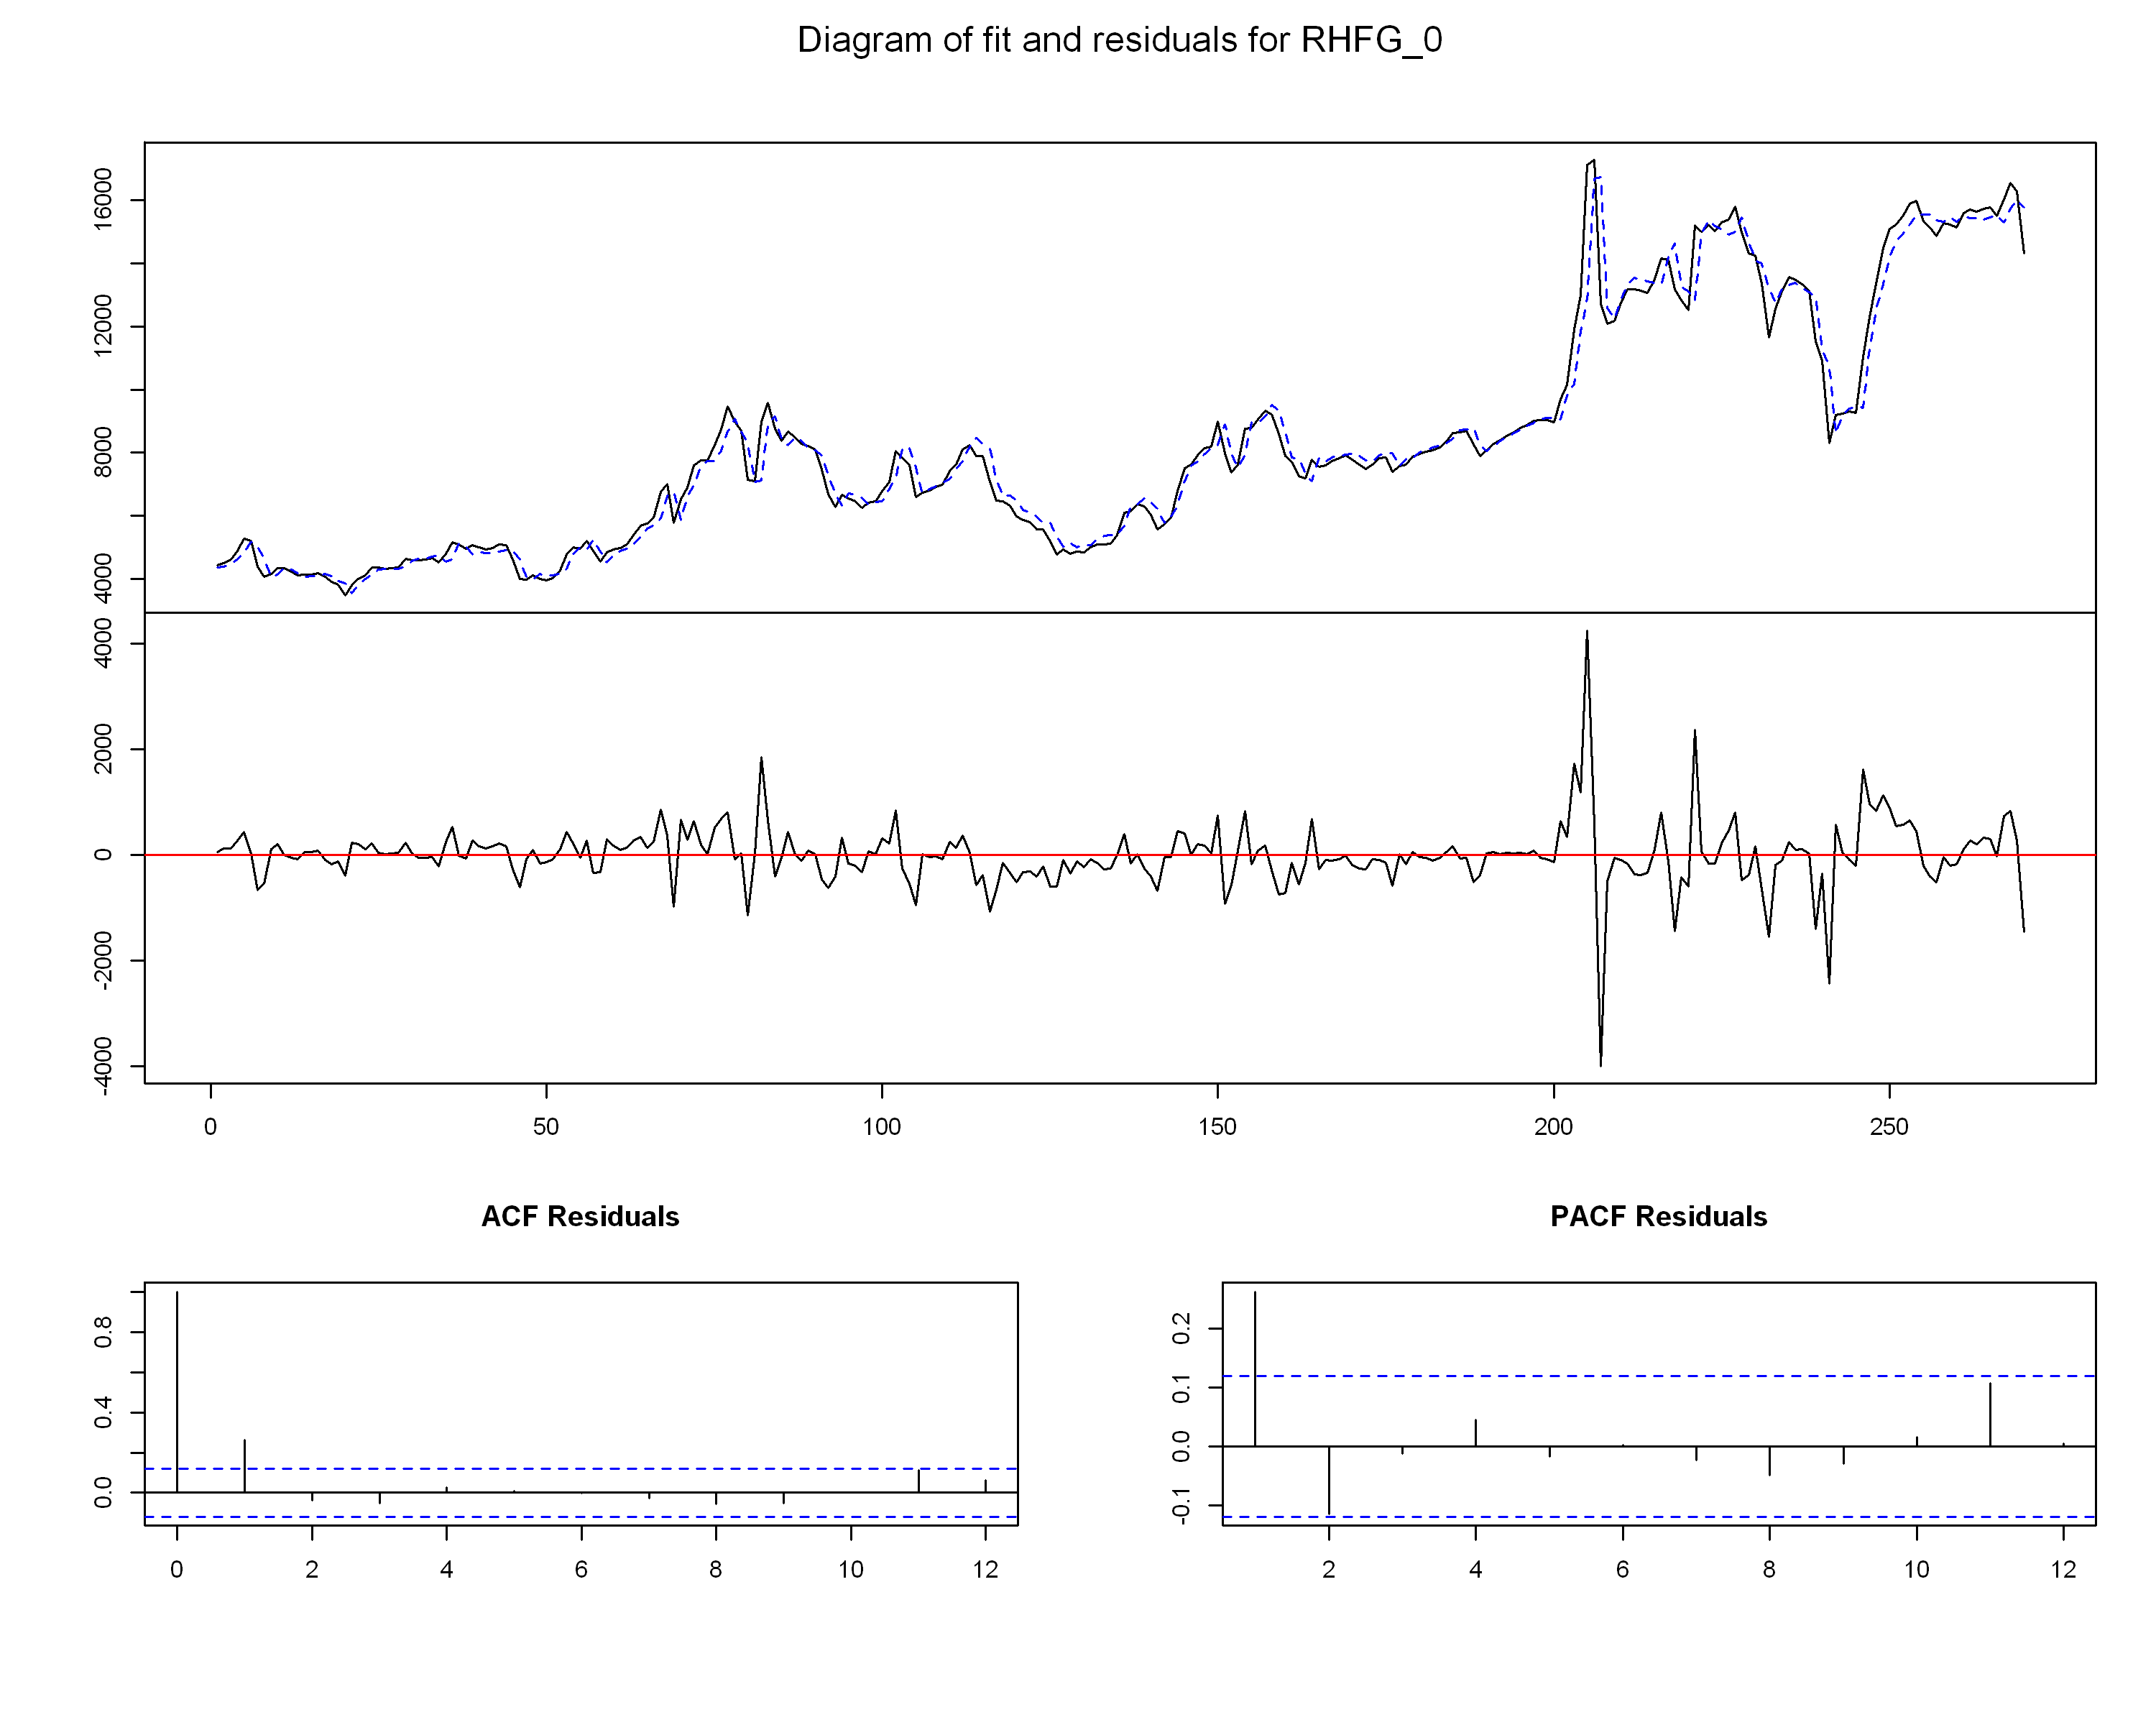

In [31]:
options(repr.plot.width=10, repr.plot.height=8)
plot(res, names = "RHFG_0")

In [32]:
install.packages("imputeTS")

also installing the dependencies 'fracdiff', 'timeDate', 'RcppArmadillo', 'stinepack', 'forecast'




package 'fracdiff' successfully unpacked and MD5 sums checked
package 'timeDate' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'stinepack' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked
package 'imputeTS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\piyayut.chi\AppData\Local\Temp\Rtmp4kFUB1\downloaded_packages


In [34]:
library(imputedTS)

ERROR: Error in library(imputedTS): there is no package called 'imputedTS'
